In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [11]:
_2019 = pd.read_csv('data/IMDB_mine_data_2019.csv')
_2018 = pd.read_csv('data/IMDB_mine_data_2018.csv')
_2017 = pd.read_csv('data/IMDB_mine_data_2017.csv')
_2016 = pd.read_csv('data/IMDB_mine_data_2016.csv')
_2015 = pd.read_csv('data/IMDB_mine_data_2015.csv')

In [237]:
#get all the films into one DF
films = pd.concat([_2019,_2018,_2017,_2016,_2015])

In [238]:
# remove the filler films we were using to start the mining bot
films = films[films['title_code'] != np.nan]
films = films[films['release_date'] != '1980-05-16']
films.shape

(2976, 27)

In [239]:
#films.release_date

In [361]:
films.head()

,index,Unnamed: 0,title,runtime,release_date,rating,prod_co,metaScore,metaUserScore,imdb_rating,...,directors,writers,budget,opening_wknd,gross_dom,gross_int,title_code,production,distribution,director
0,1,0,Motherless Brooklyn,0,2019-11-01,R,"[Class 5 Films, Warner Bros.]",0,0,0,...,[Edward Norton],"['Jonathan Lethem', 'Edward Norton']",26000000.0,3500454.0,9277736.0,18477736.0,tt0385887,Class 5 Films,Warner Bros.,Edward Norton
1,2,0,Alita: Battle Angel,0,2019-02-14,PG-13,"[Twentieth Century Fox, Twentieth Century Fox]",0,0,0,...,[Robert Rodriguez],"['James Cameron', 'Laeta Kalogridis', 'Yukito ...",170000000.0,28525613.0,85710210.0,404852543.0,tt0437086,Twentieth Century Fox,Twentieth Century Fox,Robert Rodriguez
2,3,0,Danger Close,0,2019-11-08,R,"[Deeper Water, Saboteur Media, Saban Films]",0,0,0,...,[Kriv Stenders],"['Stuart Beattie', 'James Nicholas', 'Karel Se...",35000000.0,2078370.0,NaN,NaN,tt0441881,Deeper Water,Saboteur Media,Kriv Stenders
3,4,0,Shazam!,0,2019-04-05,PG-13,"[Warner Bros., Warner Bros.]",0,0,0,...,[David F. Sandberg],"['Henry Gayden', 'Henry Gayden', 'Darren Lemke...",100000000.0,53505326.0,140371656.0,365971656.0,tt0448115,Warner Bros.,Warner Bros.,David F. Sandberg
4,5,0,The Last Full Measure,0,2020-01-24,R,"[Foresight Unlimited, Foresight Unlimited, Roa...",0,0,0,...,[Todd Robinson],['Todd Robinson'],20000000.0,1058019.0,2949212.0,3006059.0,tt0783640,Foresight Unlimited,Foresight Unlimited,Todd Robinson


In [241]:
#Reset the index now that all films are in 1 dataframe
films = films.reset_index()

# Cleaning fields and filling in some of the columns

In [242]:
re.findall(r"'(.*?)'",films.prod_co[0], re.DOTALL)

['Class 5 Films', 'Warner Bros.']

In [243]:
films.prod_co = films.prod_co.map(lambda x : re.findall(r"'(.*?)'",x, re.DOTALL))
films.prod_co[5]

['Paramount Pictures', 'Paramount Pictures']

In [244]:
films.prod_co[1][1]

'Twentieth Century Fox'

In [245]:
#break production and distribution out into their own columns
films['production'] = films['prod_co'].map(lambda x : x[0] if len(x) >= 1 else np.nan)
films['distribution'] = films['prod_co'].map(lambda x : x[1] if len(x) >= 2 else np.nan)

In [246]:
#convert the release date to a pandas datetime object
films['release_date'] = films['release_date'].map(lambda x : pd.to_datetime(x))

In [247]:
#Set the first director to their own column
films.directors = films.directors.map(lambda x : re.findall(r"'(.*?)'",x, re.DOTALL if isinstance(x, str) else np.nan))
films['director'] = films['directors'].map(lambda x: x[0] if len(x) >= 1 else np.nan)

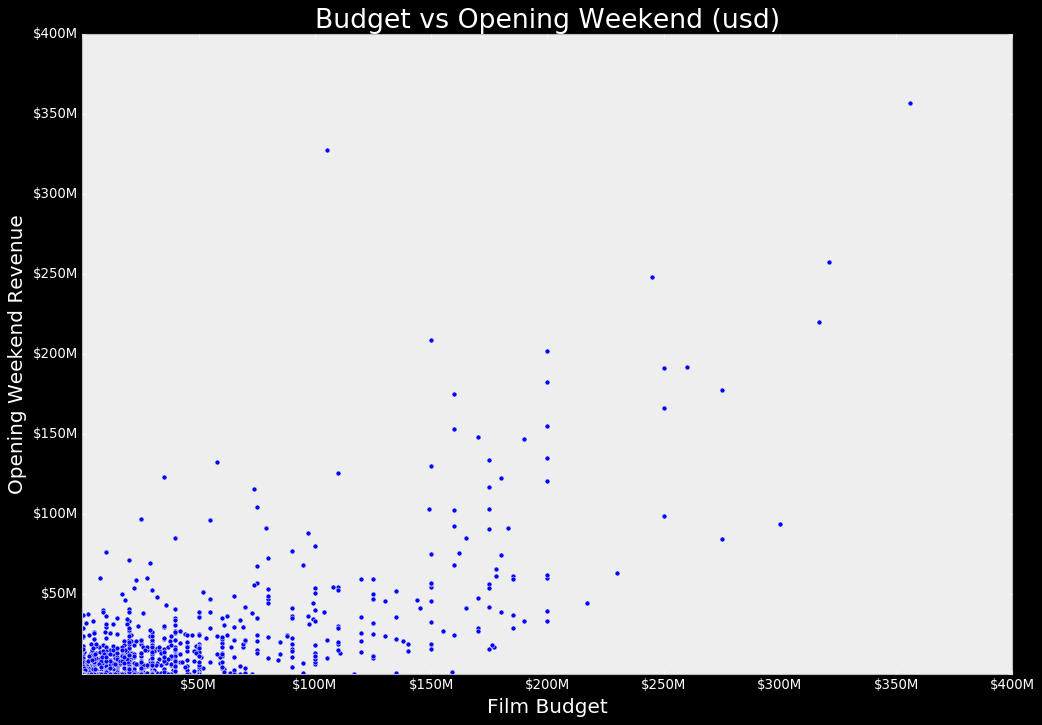

In [249]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US' )

ylab = np.arange(0,401, 50)
xlab = np.arange(0,401, 50)

fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(films.budget, films.opening_wknd)
ax.ticklabel_format(style='plain')
ax.set_ylabel('Opening Weekend Revenue', fontsize=18)
ax.set_xlabel('Film Budget', fontsize=18)
ax.set_title('Budget vs Opening Weekend (usd)', fontsize=24)
ax.grid(False)

plt.style.use('bmh')
#plt.rc('axes', labelsize=18)
plt.ylim(0, 400000000)
plt.xlim(0, 400000000)


labels = [item for item in ax.get_xticklabels()]
#print(labels)
ylabels = [item for item in ax.get_yticklabels()]
#print(ylabels)
for i in range(len(labels)):
    if i==0:
        labels[i] = ''
        continue
    labels[i] = "${}M".format(xlab[i])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)



plt.savefig('img/Budget.v.BoxOffice2.png')

In [182]:
#fig, ax = plt.subplots(figsize=(15,10))
#ax.scatter(films.release_date, films.opening_wknd)
#Bad plot

In [92]:
print(films.index)

RangeIndex(start=0, stop=2976, step=1)


In [102]:
# look at the revenue by month of release.
df = films.copy()
df.index = pd.to_datetime(df.release_date)
df['month'] = df.index.month
avg = df.groupby(pd.Grouper(freq='M')).sum()

7


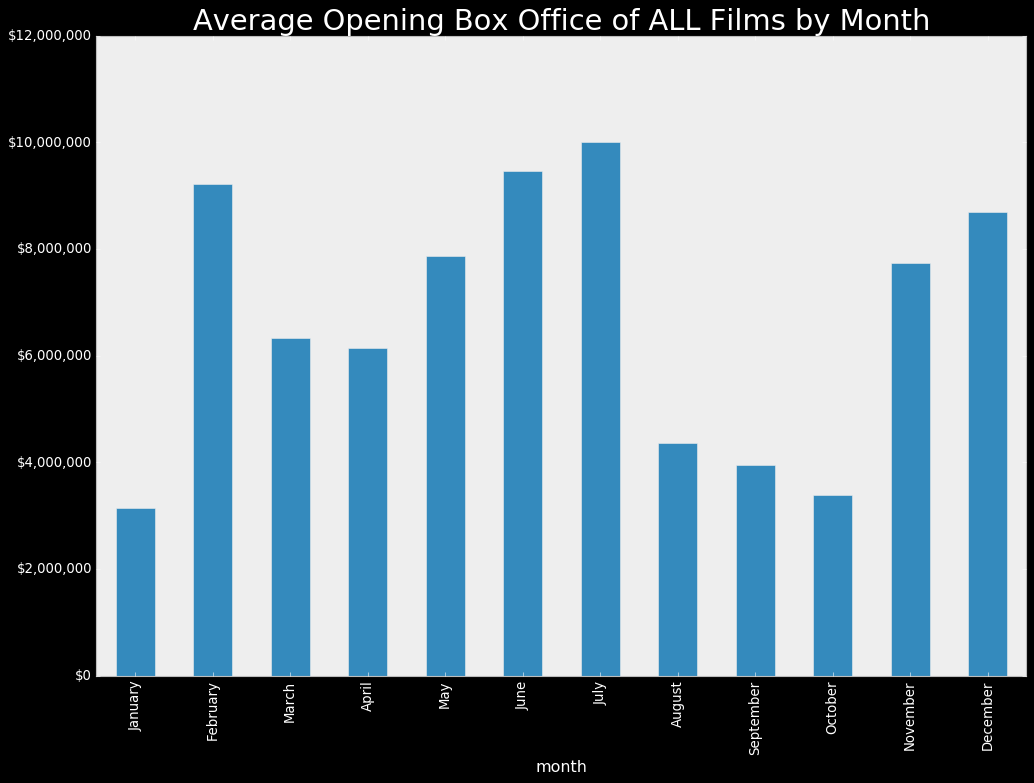

In [180]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ylab = ['$0', '$2,000,000', '$4,000,000', '$6,000,000', '$8,000,000', '$10,000,000', '$12,000,000']

fig, ax1 = plt.subplots(figsize=(15,10))

df.groupby('month').agg({'opening_wknd': 'mean'}).plot(figsize=(15,10), xlim=(1,2), grid=False, kind='bar', style='plain', legend=False, ax=ax1)
ax1.set_title('Average Opening Box Office of ALL Films by Month', fontsize=26)

labels = [item.get_text() for item in ax1.get_xticklabels()]
for i in range(len(labels)):
    labels[i] = months[i]
ax1.set_xticklabels(labels)
#ax1.ticklabel_format(style='plain')

ylabels = [item.get_text() for item in ax1.get_yticklabels()]
for i in range(len(ylabels)):
    ylabels[i] = ylab[i]
ax1.set_yticklabels(ylabels)
print(len(ylabels))

plt.savefig('img/AvgBoxOffice_byMonth2.png')

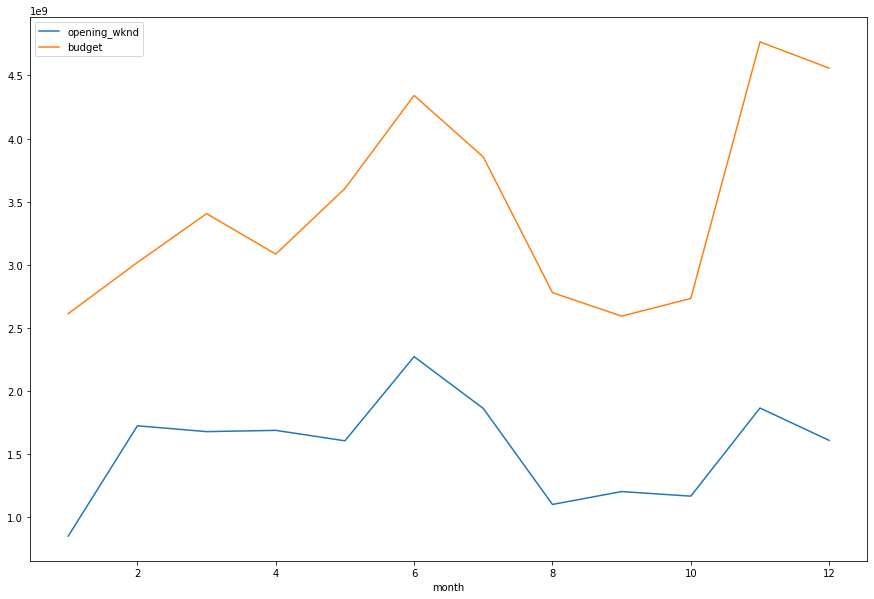

In [109]:
df.groupby('month').agg({'opening_wknd': 'sum', 'budget':'sum'}).plot(figsize=(15,10))

# Looking at the actors now.

In [355]:
from collections import defaultdict

def leaders(xs, top=21):
    counts = defaultdict(int)
    for x in xs:
        counts[x] += 1
    return sorted(counts.items(), reverse=True, key=lambda tup: tup[1])[:top]

def tailers(xs, top=21):
    counts = defaultdict(int)
    for x in xs:
        counts[x] += 1
    return sorted(counts.items(), reverse=False, key=lambda tup: tup[1])[:top]

In [431]:
all_actors = list(films.actor1) + list(films.actor2) + list(films.actor3) + list(films.actor4) + list(films.actor5) + list(films.actor6) + list(films.actor7) + list(films.actor8) + list(films.actor9) + list(films.actor10)
len(np.unique(all_actors))
unique_actors = np.unique(all_actors)

In [420]:
topActors = leaders(all_actors, top=2000)[1:]
bottomActors = tailers(all_actors, top=20)
topActors

[('/name/nm0000168/', 16),
 ('/name/nm0000437/', 14),
 ('/name/nm1209966/', 13),
 ('/name/nm0000285/', 13),
 ('/name/nm0000173/', 13),
 ('/name/nm0290556/', 12),
 ('/name/nm0000616/', 12),
 ('/name/nm0425005/', 12),
 ('/name/nm0366389/', 12),
 ('/name/nm0788335/', 12),
 ('/name/nm1221047/', 12),
 ('/name/nm0799777/', 12),
 ('/name/nm0131966/', 12),
 ('/name/nm0000204/', 11),
 ('/name/nm0000115/', 11),
 ('/name/nm3485845/', 11),
 ('/name/nm0818055/', 11),
 ('/name/nm0000160/', 11),
 ('/name/nm3053338/', 11),
 ('/name/nm0671567/', 11),
 ('/name/nm0252961/', 11),
 ('/name/nm0000329/', 11),
 ('/name/nm0134072/', 11),
 ('/name/nm0748973/', 11),
 ('/name/nm0829576/', 10),
 ('/name/nm0000234/', 10),
 ('/name/nm1165110/', 10),
 ('/name/nm0396558/', 10),
 ('/name/nm0837177/', 10),
 ('/name/nm0000190/', 10),
 ('/name/nm0251986/', 10),
 ('/name/nm0001376/', 10),
 ('/name/nm0136797/', 10),
 ('/name/nm4446467/', 10),
 ('/name/nm0000215/', 10),
 ('/name/nm1727304/', 10),
 ('/name/nm0000353/', 10),
 

In [435]:
#generating a list of missing actor codes for the bot to go fetch for me
codes = [i[0] for i in topActors]
missing_codes =[]
gathered = np.array(actor_key['actor'])
for c in unique_actors:
    if c not in gathered:
        missing_codes.append(c)

print(len(missing_codes))
fetch_df = pd.DataFrame(np.unique(missing_codes), columns=['actor'])
fetch_df.to_csv('data/actor_fetch_list2.csv')
fetch_df.info()

12762
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12762 entries, 0 to 12761
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   actor   12762 non-null  object
dtypes: object(1)
memory usage: 99.8+ KB


In [357]:
a_keys = [i[0] for i in topActors]
b_keys = [i[0] for i in bottomActors]
a_keys
b_keys

['/name/nm11046471/',
 '/name/nm0740168/',
 '/name/nm10651990/',
 '/name/nm10810195/',
 '/name/nm5634768/',
 '/name/nm4069220/',
 '/name/nm7617524/',
 '/name/nm10758564/',
 '/name/nm10385769/',
 '/name/nm3054850/',
 '/name/nm4060295/',
 '/name/nm1060352/',
 '/name/nm10600316/',
 '/name/nm10603252/',
 '/name/nm4147126/',
 '/name/nm10695943/',
 '/name/nm2114691/',
 '/name/nm2306402/',
 '/name/nm3721607/',
 '/name/nm0448486/']

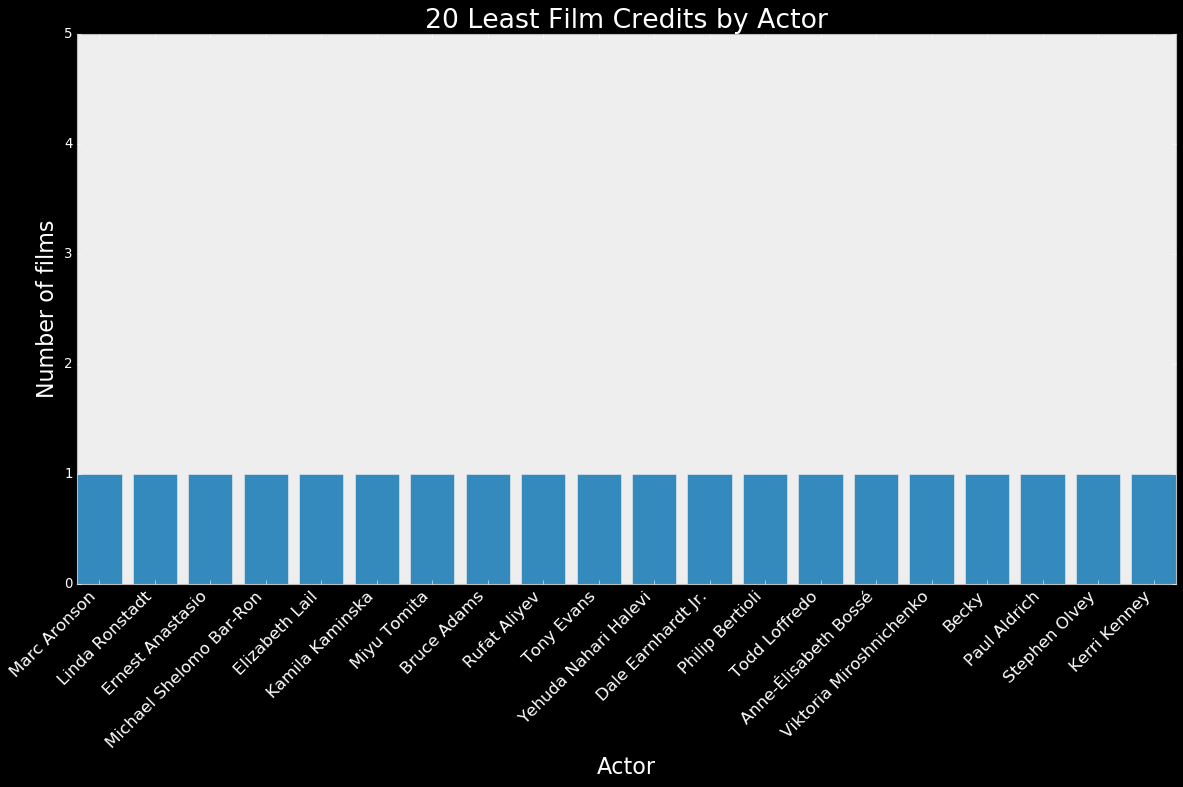

In [359]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(*zip(*bottomActors))
plt.xticks(rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.ylim(0,5)
plt.xticks(fontsize=15)

ax.set_ylabel('Number of films', fontsize=20)
ax.set_xlabel('Actor', fontsize=20)
ax.set_title('20 Least Film Credits by Actor', fontsize=24)
ax.grid(False)

labels = get_actor_names(b_keys)
ax.set_xticklabels(labels)

plt.tight_layout()
plt.savefig('img/FilmCountByActor3.png')

In [423]:
# Manually pushing missing entries into the DF to dodge errors

'''missing_df = pd.DataFrame(columns=['actor','name'])
missing_df.loc[0] = ['/name/nm0136797/', 'Steve Carell']
missing_df.loc[1] = ['/name/nm0000352/', "Vincent D'Onofrio"]
missing_df.loc[2] = ['/name/nm0249291/', 'Joel Edgerton']
missing_df.loc[3] = ['/name/nm0186505/', 'Bryan Cranston']
missing_df.loc[4] = ['/name/nm1527905/', 'Toby Kebbell']
missing_df.loc[5] = ['/name/nm1913734/', 'Rooney Mara']
missing_df.loc[6] = ['/name/nm0000949/', 'Cate Blanchett']
missing_df.loc[7] = ['/name/nm2254074/', 'Bella Thorne']
missing_df.loc[8] = ['/name/nm2525790/', 'Bel Powley']
missing_df.loc[9] = ['/name/nm0000604/', 'John C. Reilly']
missing_df.loc[10] = ['/name/nm0356017/', 'Rebecca Hall']
missing_df.loc[11] = ['/name/nm1063517/', 'Kathryn Hahn']
missing_df.loc[12] = ['/name/nm1325419/', 'Kristen Wiig']
missing_df.loc[13] = ['/name/nm0148418/', 'Michael Cera']
missing_df.loc[14] = ['/name/nm2368789/', 'Zoe Kravitz']

missing_df.head()'''

#abandoned this approach

'missing_df = pd.DataFrame(columns=[\'actor\',\'name\'])\nmissing_df.loc[0] = [\'/name/nm0136797/\', \'Steve Carell\']\nmissing_df.loc[1] = [\'/name/nm0000352/\', "Vincent D\'Onofrio"]\nmissing_df.loc[2] = [\'/name/nm0249291/\', \'Joel Edgerton\']\nmissing_df.loc[3] = [\'/name/nm0186505/\', \'Bryan Cranston\']\nmissing_df.loc[4] = [\'/name/nm1527905/\', \'Toby Kebbell\']\nmissing_df.loc[5] = [\'/name/nm1913734/\', \'Rooney Mara\']\nmissing_df.loc[6] = [\'/name/nm0000949/\', \'Cate Blanchett\']\nmissing_df.loc[7] = [\'/name/nm2254074/\', \'Bella Thorne\']\nmissing_df.loc[8] = [\'/name/nm2525790/\', \'Bel Powley\']\nmissing_df.loc[9] = [\'/name/nm0000604/\', \'John C. Reilly\']\nmissing_df.loc[10] = [\'/name/nm0356017/\', \'Rebecca Hall\']\nmissing_df.loc[11] = [\'/name/nm1063517/\', \'Kathryn Hahn\']\nmissing_df.loc[12] = [\'/name/nm1325419/\', \'Kristen Wiig\']\nmissing_df.loc[13] = [\'/name/nm0148418/\', \'Michael Cera\']\nmissing_df.loc[14] = [\'/name/nm2368789/\', \'Zoe Kravitz\']\n

In [433]:
actor_key = pd.read_csv('data/2019_actors_out.csv', index_col=0).reset_index()
#actor_key = pd.read_csv('data/2019_actors_out.csv', index_col=0).append(missing_df).reset_index() #<--- This is a dirty hack to push a missing actor into the DF
actor_key.shape

(37567, 3)

In [440]:
row = actor_key.loc[actor_key['actor'] == '/name/nm0136797/'].index[0] #/name/nm0000168/
print(row)
actor_key.iloc[row]['name']

37115


'Steve Carell'

In [441]:
def get_actor_names(keys):
    r = []
    for k in keys:
        r.append(get_actor_name(k))
    return r

def get_actor_name(key):
    #print(key)
    row = actor_key.loc[actor_key['actor'] == key].index[0]
    return(actor_key.iloc[row]['name'])

def get_actor_key(name):
    #print(key)
    row = actor_key.loc[actor_key['name'] == key].index[0]
    return(actor_key.iloc[row]['actor'])

In [360]:
#get_actor_names(a_keys)

# Using the work I just did on the actors to generate a filter for the actor columns in the main DF

In [439]:
keepActors = leaders(all_actors, top=250)[1:]
k_keys = [i[0] for i in keepActors]
get_actor_names(k_keys)

['Samuel L. Jackson',
 'Woody Harrelson',
 'Oscar Isaac',
 'Alec Baldwin',
 'Nicole Kidman',
 'James Franco',
 'Eric Roberts',
 'Dwayne Johnson',
 'Kevin Hart',
 'Michael Shannon',
 'Keegan-Michael Key',
 'J.K. Simmons',
 'Bill Camp',
 'Natalie Portman',
 'Nicolas Cage',
 'Adam Driver',
 'Octavia Spencer',
 'Ethan Hawke',
 'Margot Robbie',
 'Michael Peña',
 'Idris Elba',
 'Jackie Chan',
 'Bobby Cannavale',
 'Maya Rudolph',
 'Kristen Stewart',
 'Charlize Theron',
 'Chris Hemsworth',
 'Nicholas Hoult',
 'Jason Sudeikis',
 'Matthew McConaughey',
 'Jesse Eisenberg',
 'Isabelle Huppert',
 'Steve Carell',
 'Tye Sheridan',
 'Susan Sarandon',
 'Domhnall Gleeson',
 'Willem Dafoe',
 'Anna Kendrick',
 'Nick Offerman',
 'Elisabeth Moss',
 'Tiffany Haddish',
 'Scarlett Johansson',
 'Michael Fassbender',
 'Morgan Freeman',
 'Jenny Slate',
 "Vincent D'Onofrio",
 'Sam Rockwell',
 'Toby Jones',
 'Bill Hader',
 'Common',
 'James McAvoy',
 'Imogen Poots',
 'Byung-hun Lee',
 'Tom Hanks',
 'Helen Mirren',


In [446]:
keep_df = pd.DataFrame(columns=['actor', 'name'])
print(len(k_keys))
keep_df['actor'] = k_keys
keep_df['name'] = get_actor_names(k_keys)
keep_df.head()

249


,actor,name
0,/name/nm0000168/,Samuel L. Jackson
1,/name/nm0000437/,Woody Harrelson
2,/name/nm1209966/,Oscar Isaac
3,/name/nm0000285/,Alec Baldwin
4,/name/nm0000173/,Nicole Kidman
